In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

In [2]:
# plt.rc('font', family='serif', serif='Times')
# plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

In [3]:
# Get seedlist
file = 'seedlist.dat'
with open(file) as f:
    seed_list = []
    for line in f: # read rest of lines
        seed_list.append([int(x) for x in line.split()][0])
print(seed_list)

[382084, 959804, 880775, 707317, 638913, 160861, 468738, 814726, 792012, 752389]


In [4]:
# Set mode to train or test
mode = "train"
print(mode)

train


In [5]:
# Initialize results dictionary
results = {}

In [6]:
# Load other additional experiments
experiment_list=[
    'csense_t24_random-base_g0.997-n0.7',
    'cenp_t24_random-base_g0.997-n0.7',
#     'cenpxsense_t24_random-base_g0.997-n0.7',

#     'cenpsense_t24_random-base_g0.997-n0.7-p0.2',
#     'cenpsense_t24_random-base_g0.997-n0.7-p0.5',
#     'cenpsense_t24_random-base_g0.997-n0.7-p0.8',
    
#     'cenp_t24_random-morl_runtimev2_g0.997-n0.7-p0.2',
#     'cenp_t24_random-morl_runtimev2_g0.997-n0.7-p0.5',
#     'cenp_t24_random-morl_runtimev2_g0.997-n0.7-p0.8',
    
#     'cenp_t24_random-morl_runtime_g0.997-n0.7-p0.2',
#     'cenp_t24_random-morl_runtime_g0.997-n0.7-p0.5',
#     'cenp_t24_random-morl_runtime_g0.997-n0.7-p0.8',
    
#     'cenp_t24_random-off_policy_g0.997-n0.7-random_pref-intrp4',
#     'cenp_t24_random-off_policy_diffg0.997-n0.7-random_pref-intrp4',
#     'cenp_t24_random-off_policy_diff2g0.997-n0.7-random_pref-intrp4',

    'cenp_t24_random-off_policy_g0.997-n0.7-const_pref0.1-intrp4',
#     'cenp_t24_random-off_policy_g0.997-n0.7-const_pref0.2-intrp4',
#     'cenp_t24_random-off_policy_g0.997-n0.7-const_pref0.5-intrp4',
    'cenp_t24_random-off_policy_g0.997-n0.7-const_pref0.8-intrp4',

]

for experiment in experiment_list:
    results[experiment]={}        
    for seed_no in seed_list:
        # Load data of experiment and store in a dictionary
        tag = experiment + '-' + str(seed_no)
        cur_folder = os.getcwd()
        exp_results_folder = os.path.join(cur_folder,"results", experiment, mode) # experiment folder
        exp_results_file = os.path.join(exp_results_folder, tag + '-'+ mode + '.npy') # experiment data file
        exp_result = np.load(exp_results_file,allow_pickle='TRUE').item()
        results[experiment][seed_no] = exp_result # load to dictionary


In [7]:
# Get list of locations and years in the experimental data
location_list   = list(results[experiment_list[0]][seed_list[0]].keys())
year_list       = list(results[experiment_list[0]][seed_list[0]][location_list[0]].keys())

In [8]:
experiment_label = {'csense_t24_random-base_g0.997-n0.7':'sense',
                    'cenp_t24_random-base_g0.997-n0.7':'enp',
                    
                    'cenpxsense_t24_random-base_g0.997-n0.7':'mul_scalar',
                    
                    'cenpsense_t24_random-base_g0.997-n0.7-p0.2':'add_scalar,0.2',
                    'cenpsense_t24_random-base_g0.997-n0.7-p0.5':'add_scalar,0.5',
                    'cenpsense_t24_random-base_g0.997-n0.7-p0.8':'add_scalar,0.8',
                    
                    'cenp_t24_random-morl_runtime_g0.997-n0.7-p0.2':'morl_runtime,0.2',
                    'cenp_t24_random-morl_runtime_g0.997-n0.7-p0.5':'morl_runtime,0.5',
                    'cenp_t24_random-morl_runtime_g0.997-n0.7-p0.8':'morl_runtime,0.8',
                    
                    'cenp_t24_random-morl_runtimev2_g0.997-n0.7-p0.2':'morl_runtimev2,0.2',
                    'cenp_t24_random-morl_runtimev2_g0.997-n0.7-p0.5':'morl_runtimev2,0.5',
                    'cenp_t24_random-morl_runtimev2_g0.997-n0.7-p0.8':'morl_runtimev2,0.8',
                    
                    'cenp_t24_random-off_policy_g0.997-n0.7-random_pref-intrp4':'morl',
                    'cenp_t24_random-off_policy_diffg0.997-n0.7-random_pref-intrp4':'morl_dg', 
                    'cenp_t24_random-off_policy_diff2g0.997-n0.7-random_pref-intrp4':'morl_dg2', 

                    'cenp_t24_random-off_policy_g0.997-n0.7-const_pref0.1-intrp4':'morl_cpf1',
                    'cenp_t24_random-off_policy_g0.997-n0.7-const_pref0.2-intrp4':'morl_cpf2',
                    'cenp_t24_random-off_policy_g0.997-n0.7-const_pref0.5-intrp4':'morl_cpf5',
                    'cenp_t24_random-off_policy_g0.997-n0.7-const_pref0.8-intrp4':'morl_cpf8',

                   }
experiment_color = {'csense_t24_random-base_g0.997-n0.7':'tab:red',
                    'cenp_t24_random-base_g0.997-n0.7':'tab:green',
                    
                    'cenpxsense_t24_random-base_g0.997-n0.7':'tab:brown',
                    
                    'cenpsense_t24_random-base_g0.997-n0.7-p0.2':'tab:cyan',
                    'cenpsense_t24_random-base_g0.997-n0.7-p0.5':'tab:purple',
                    'cenpsense_t24_random-base_g0.997-n0.7-p0.8':'tab:pink',
                    
                    'cenp_t24_random-morl_runtime_g0.997-n0.7-p0.2':'tab:cyan',
                    'cenp_t24_random-morl_runtime_g0.997-n0.7-p0.5':'tab:purple',
                    'cenp_t24_random-morl_runtime_g0.997-n0.7-p0.8':'tab:pink',
                    
                    'cenp_t24_random-morl_runtimev2_g0.997-n0.7-p0.2':'tab:cyan',
                    'cenp_t24_random-morl_runtimev2_g0.997-n0.7-p0.5':'tab:purple',
                    'cenp_t24_random-morl_runtimev2_g0.997-n0.7-p0.8':'tab:pink',
                    
                    'cenp_t24_random-off_policy_g0.997-n0.7-random_pref-intrp4':'tab:blue',
                    'cenp_t24_random-off_policy_diffg0.997-n0.7-random_pref-intrp4':'tab:orange',
                    'cenp_t24_random-off_policy_diff2g0.997-n0.7-random_pref-intrp4':'tab:green',
                    
                    'cenp_t24_random-off_policy_g0.997-n0.7-const_pref0.1-intrp4':'tab:brown',
                    'cenp_t24_random-off_policy_g0.997-n0.7-const_pref0.2-intrp4':'tab:blue',
                    'cenp_t24_random-off_policy_g0.997-n0.7-const_pref0.5-intrp4':'tab:orange',
                    'cenp_t24_random-off_policy_g0.997-n0.7-const_pref0.8-intrp4':'tab:green',
                    

                   }

# experiment_linestyle = {'csense_t24_random-base_g0.997-n0.7':'tab:red',
#                         'cenp_t24_random-base_g0.997-n0.7':'tab:green',

#                         'cenpxsense_t24_random-base_g0.997-n0.7':'tab:brown',

#                         'cenpsense_t24_random-base_g0.997-n0.7-p0.2':'tab:cyan',
#                         'cenpsense_t24_random-base_g0.997-n0.7-p0.5':'tab:purple',
#                         'cenpsense_t24_random-base_g0.997-n0.7-p0.8':'tab:pink',

#                         'cenp_t24_random-off_policy_g0.997-n0.7-random_pref-intrp4-p0.2',
#                         'cenp_t24_random-off_policy_g0.997-n0.7-random_pref-intrp4-p0.5', 
#                         'cenp_t24_random-off_policy_g0.997-n0.7-random_pref-intrp4-p0.8', 

#                        }

In [9]:
# Get list of locations and years in the experimental data

# Add keys to dictionaries
for experiment in experiment_list:
    results[experiment]["minimum"] = {}
    results[experiment]["first_q"] = {}
    results[experiment]["average"] = {}
    results[experiment]["third_q"] = {}
    results[experiment]["maximum"] = {}
    for location in location_list:
        results[experiment]["minimum"][location] = {}
        results[experiment]["first_q"][location] = {}
        results[experiment]["average"][location] = {}
        results[experiment]["third_q"][location] = {}
        results[experiment]["maximum"][location] = {}
        for year in year_list:
            results[experiment]["minimum"][location][year] = {}
            results[experiment]["first_q"][location][year] = {}
            results[experiment]["average"][location][year] = {}
            results[experiment]["third_q"][location][year] = {}
            results[experiment]["maximum"][location][year] = {}
            


# get min, avg and max downtimes
for experiment in experiment_list:
    for location in location_list:
        for year in year_list:
            dummy = []
            for seed in seed_list:
                dummy.append(results[experiment][seed][location][year]['downtimes'])
            results[experiment]["minimum"][location][year]['downtimes'] = np.min(dummy)
            results[experiment]["first_q"][location][year]['downtimes'] = np.percentile(dummy, 25)
            results[experiment]["average"][location][year]['downtimes'] = np.mean(dummy)
            results[experiment]["third_q"][location][year]['downtimes'] = np.percentile(dummy, 75)
            results[experiment]["maximum"][location][year]['downtimes'] = np.max(dummy)

# get min, avg and max avg_sense_reward
for experiment in experiment_list:
    for location in location_list:
        for year in year_list:
            dummy = []
            for seed in seed_list:
                avgsnsrwd = results[experiment][seed][location][year]['sense_reward_log'].mean()
                results[experiment][seed][location][year]['avg_sense_reward'] = avgsnsrwd # add new entry
                dummy.append(avgsnsrwd)
            results[experiment]["minimum"][location][year]['avg_sense_reward'] = np.min(dummy)
            results[experiment]["first_q"][location][year]['avg_sense_reward'] = np.percentile(dummy, 25)
            results[experiment]["average"][location][year]['avg_sense_reward'] = np.mean(dummy)
            results[experiment]["third_q"][location][year]['avg_sense_reward'] = np.percentile(dummy, 75)
            results[experiment]["maximum"][location][year]['avg_sense_reward'] = np.max(dummy)
            
# get min, avg and max avg_enp_reward
for experiment in experiment_list:
    for location in location_list:
        for year in year_list:
            dummy = []
            for seed in seed_list:
                avgenprwd = results[experiment][seed][location][year]['enp_reward_log'].mean()
                results[experiment][seed][location][year]['avg_enp_reward'] = avgenprwd # add new entry
                dummy.append(avgenprwd)
            results[experiment]["minimum"][location][year]['avg_enp_reward'] = np.min(dummy)
            results[experiment]["first_q"][location][year]['avg_enp_reward'] = np.percentile(dummy, 25)
            results[experiment]["average"][location][year]['avg_enp_reward'] = np.mean(dummy)
            results[experiment]["third_q"][location][year]['avg_enp_reward'] = np.percentile(dummy, 75)
            results[experiment]["maximum"][location][year]['avg_enp_reward'] = np.max(dummy)

tokyo


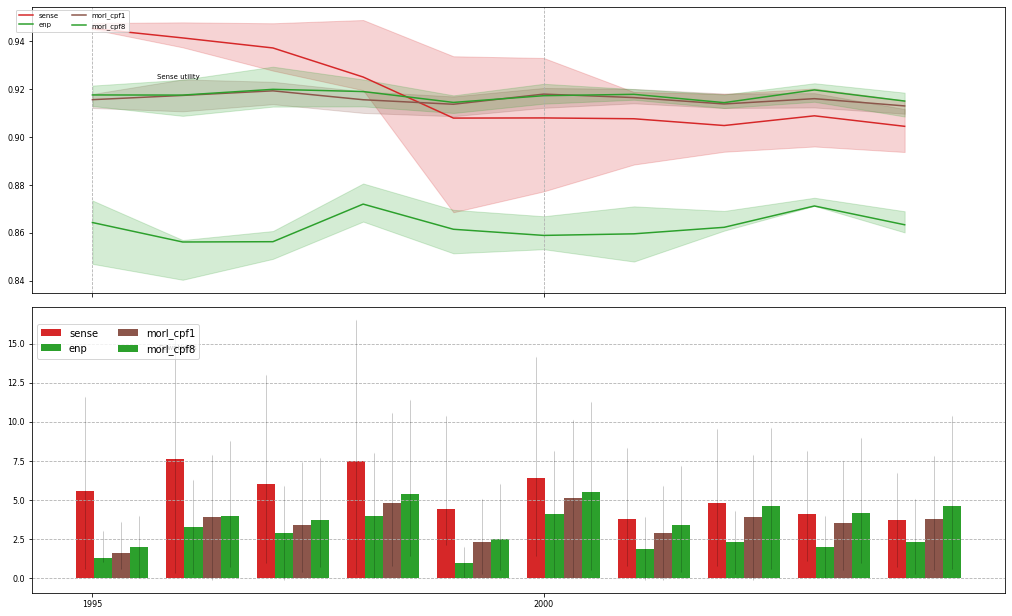

In [10]:
# Downtimes and Sense Rewards

single_column_figure_width = 3.487*5
double_column_figure_width = 7

fig_width = single_column_figure_width
fig_height = fig_width / 1.618

fig, axs = plt.subplots(nrows=2,
                        ncols=1,
                        figsize=[fig_width,fig_height], # in inches
                        sharex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.05)

#######################################################################################
# # left  = 0.125  # the left side of the subplots of the figure
# # right = 0.9    # the right side of the subplots of the figure
# # bottom = 0.1   # the bottom of the subplots of the figure
# # top = 0.9      # the top of the subplots of the figure
# # wspace = 0.2   # the amount of width reserved for blank space between subplots
# # hspace = 0.2   # the amount of height reserved for white space between subplots
#######################################################################################

sense_reward_ax  = axs[0]
downtimes_ax = axs[1]
# downtimes_ax = axs

location = 'tokyo'
print(location)

# avg_sense_reward
for experiment in experiment_list:
    min_data = [results[experiment]["minimum"][location][year]['avg_sense_reward'] for year in year_list]
    qt1_data = [results[experiment]["first_q"][location][year]['avg_sense_reward'] for year in year_list]
    avg_data = [results[experiment]["average"][location][year]['avg_sense_reward'] for year in year_list]
    qt3_data = [results[experiment]["third_q"][location][year]['avg_sense_reward'] for year in year_list]
    max_data = [results[experiment]["maximum"][location][year]['avg_sense_reward'] for year in year_list]

    
    sense_reward_ax.fill_between(year_list, y1=qt1_data, y2=qt3_data, 
                                 color=experiment_color[experiment],
                                 alpha=0.2)
    sense_reward_ax.plot(year_list, avg_data, 
                         color=experiment_color[experiment], 
                         label=experiment_label[experiment]
                        )
    
sense_reward_ax.text(0.15,0.75, 'Sense utility', 
         size='x-small', ha="center", 
         transform=sense_reward_ax.transAxes)
# sense_reward_ax.set_title('sense utility')
# sense_reward_ax.set_ylabel('sense utility')    
sense_reward_ax.legend(loc="lower left",
                       ncol=2,
                       fontsize='x-small',
                       bbox_to_anchor=(-0.02,0.9,1,1))
sense_reward_ax.grid(which='major', axis='x', linestyle='--')

# Downtimes
for experiment in experiment_list:
    min_data = [results[experiment]["minimum"][location][year]['downtimes'] for year in year_list]
    qt1_data = [results[experiment]["first_q"][location][year]['downtimes'] for year in year_list]
    avg_data = [results[experiment]["average"][location][year]['downtimes'] for year in year_list]
    qt3_data = [results[experiment]["third_q"][location][year]['downtimes'] for year in year_list]
    max_data = [results[experiment]["maximum"][location][year]['downtimes'] for year in year_list]
    
    width = 0.8/len(experiment_list)  # the width of the bars 
    xroot = np.array(year_list) # label locations
    xoffset = -0.8/2 + experiment_list.index(experiment) 
    downtimes_ax.bar(xroot+xoffset*width, avg_data,width, yerr = [qt1_data,qt3_data], 
                     color=experiment_color[experiment], 
                     label=experiment_label[experiment],
                     error_kw=dict(ecolor='black', lw=1, capsize=0.5, capthick=width*0.5, alpha=0.2))

downtimes_ax.set_xticks(year_list[::5])
downtimes_ax.set_xticklabels(year_list[::5], rotation=0)

downtimes_ax.text(0.15,0.85, 'Downtimes', 
                 size='x-small', ha="center", 
                 transform=downtimes_ax.transAxes)
# downtimes_ax.set_title('downtimes')
# downtimes_ax.set_ylabel('downtimes')    
downtimes_ax.legend(loc="lower left",
                   ncol=2,
                   bbox_to_anchor=(0,0.8,1,1))
downtimes_ax.grid(which='major', axis='y', linestyle='--')
# fig.savefig('./figures/morl-test.png', dpi=300, bbox_inches='tight', transparent=True)